In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/UiT-sok-2013-h24/arbeidskrav2/5a3131437da15bf77fa821ca19fd4503b7e334cd/datasett1.csv"
data1 = pd.read_csv(url)

### Oppgave 1

In [2]:
data1['Openness'] = (data1['EXP'] + data1['IMP'])/ data1['gdp'] * 100
data1['gdp per capita'] = (data1['gdp'] / data1['pop'])
data1['TIME'] = data1['TIME'].astype(int)

unique_countries = data1['LOCATION'].unique()

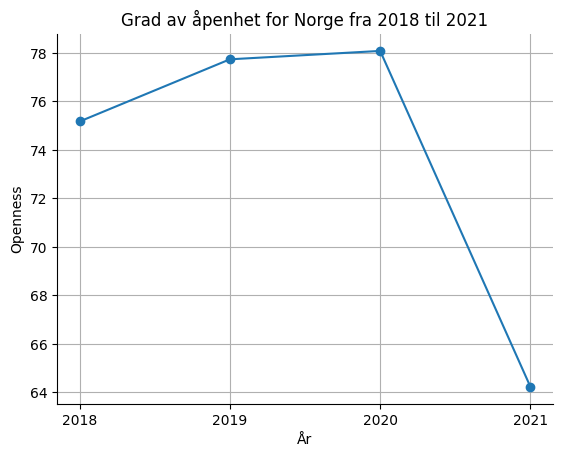

In [3]:
unique_countries = data1['LOCATION'].unique()
norge_data = data1[(data1['LOCATION'] == 'NOR') & (data1['TIME'].between(2018, 2021))]

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(norge_data['TIME'],norge_data['Openness'],marker = 'o')

ax.set_title('Grad av åpenhet for Norge fra 2018 til 2021')
ax.set_xlabel('År')
ax.set_ylabel('Openness')
ax.set_xticks(norge_data['TIME'].unique())
ax.grid(True);

Degree of openness er gitt av følgende formel:

$$ Degree \; of \; openness = \dfrac{X + M}{GDP} \;

,der \; X \; = \; eskport \;  og \;  I \; =  \;import $$

"Degree Of Openness" eller graden av åpenhet måler landets økonomiske forbindelser med andre land. Slike forbindelser består av utveksling av varer og tjenester, eller i utveksling av innsatsfaktorer. 

I Norge økte graden av åpenhet fra 2019 til 2020, i 2021 var det en betydelig nedgang til nivåer som ligger betraktelig under nivået fra 2018. Dette kan ha flere årsaker, men en av de mest sannsynlige faktorene er COVID-19-pandemien. Pandemien førte til omfattende nedstengninger og forstyrelser i handelsmønsterne. Den økonomiske nedgangen førte blant annet til lavere etterspørsel etter flere typer varer og tjenester (som feks olje og gass), som kan ha resultert i reduserte handelsnivåer. 

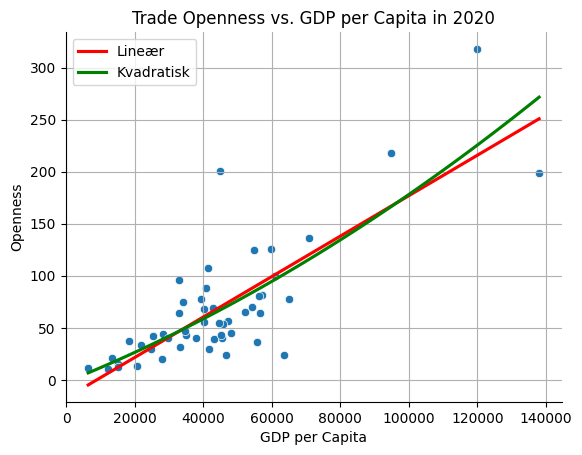

In [4]:
data_for_2020 = data1[data1['TIME'] == 2020]

fig,ax=plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.regplot(x='gdp per capita', y='Openness', data=data_for_2020, ci=None, scatter=False, order=1, ax=ax, label='Lineær', line_kws={'color': 'red'})
sns.regplot(x='gdp per capita', y='Openness', data=data_for_2020, ci=None, scatter=False, order=2, ax=ax, label='Kvadratisk', line_kws={'color': 'green'})
sns.scatterplot(x='gdp per capita', y='Openness', data=data_for_2020)

ax.set_title('Trade Openness vs. GDP per Capita in 2020')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Openness')
ax.grid(True)
ax.legend();

Figuren viser sammenhengen mellom graden av åpenhet og BNP per innbygger (GDP per capita) for forskjellige land i 2020. Scatterplottet illustrerer spredningen av dataen med hensyn til disse to variablene.

- Lineær regresjonslinje (rød) gir en enkel modellering av sammenhengen med en rett linje. Dette kan være nyttig for å vise en generell trend i dataene, men den kan ikke fange opp mer komplekse mønstre.
- Kvadratisk regresjonslinje (grønn) inkluderer et andregrads ledd, noe som gjør at linjen kan bøye seg for å passe bedre med data som har en ikke-lineær trend. Dette kan være nyttig dersom dataen viser kurvelignende trend.

I denne figuren kan en kvadratisk regresjon gi en mer nøyaktig tilpasning, men jeg mener at den lineære modellen er tilstrekkelig nok i dette tilfellet. 

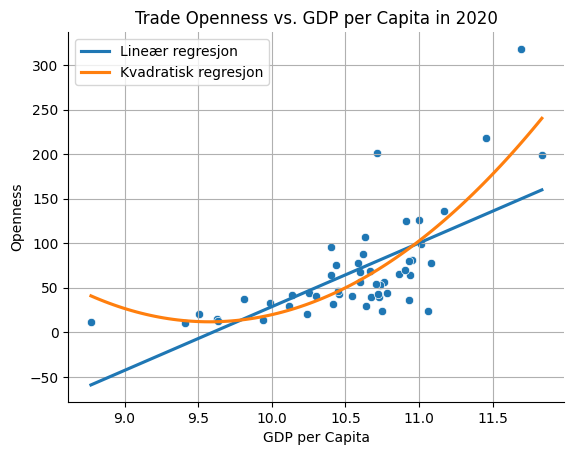

In [11]:
data_for_2020.loc[:, 'log gdp per capita'] = np.log(data_for_2020['gdp per capita'])

fig, ax = plt.subplots()

sns.regplot(x='log gdp per capita', y='Openness', data=data_for_2020, ci=None, label='Lineær regresjon', order=1, ax=ax, scatter=False)
sns.regplot(x='log gdp per capita', y='Openness', data=data_for_2020, ci=None, label='Kvadratisk regresjon', order=2, ax=ax,scatter=False)
sns.scatterplot(x='log gdp per capita', y='Openness', data=data_for_2020)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Trade Openness vs. GDP per Capita in 2020')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Openness')
ax.grid(True)
ax.legend();

I økonomisk analyse er det ofte bedre å tolke effekter på logaritmisk skala. Endringer i logaritmen til en variabel er proportional med relative (prosentvise) endringer i den opprinnelige variabelen. BNP per capita kan variere sterkt mellom land, og noen land kan ha ekstremt høye verdier som strekker skalaen. Log-transformasjon modererer denne effekten og gir en mer jevn fordeling av dataene. Dette kan ofte gjøre det enklere å passe en lineær modell (lineær regresjon) til dataene, men kan også i noen situasjoner føre til misvisende resultater.  

I denne figuren ser man at dataene har en mer tydelig kurvelignende trend, noe som gjør at den kvadratiske modellen passer bedre med dataene. 

### Oppgave 2

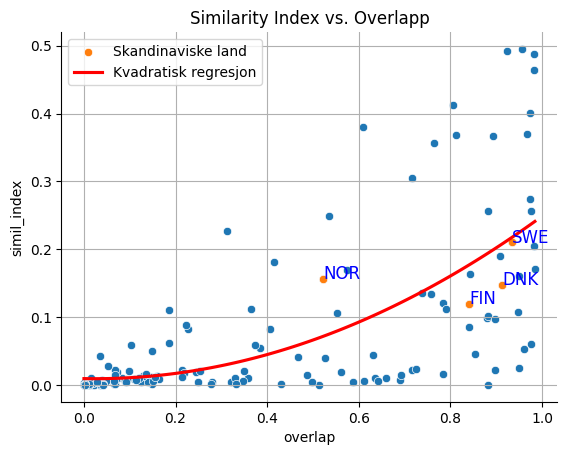

In [6]:
url2 = "https://raw.githubusercontent.com/UiT-sok-2013-h24/arbeidskrav2/5a3131437da15bf77fa821ca19fd4503b7e334cd/datasett2.csv"

data2 = pd.read_csv(url2)

data3 = data2[data2['pcode'].isin(['NOR', 'SWE', 'FIN', 'DNK'])]  # Velger ut spesifikke land

fig, ax = plt.subplots()

sns.scatterplot(data=data2, x='overlap', y='simil_index')
sns.scatterplot(data=data3, x='overlap',y='simil_index', label ='Skandinaviske land')

sns.regplot(data=data2, x='overlap', y='simil_index', ci=False, scatter=False, color='red', order=2, label='Kvadratisk regresjon')

for i, row in data3.iterrows():
    ax.text(row['overlap'], row['simil_index'], row['pcode'], color='blue', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Similarity Index vs. Overlapp')
ax.legend(loc='best')
ax.grid(True);

Overlap og Similarity index er begreper som brukes til å analysere handelsmønstre mellom land. De hjelper å forstå i hvilken grad landenes handelsaktiviteter er samskjørte eller overlapper, som kan indikere økonomiske likheter og komplimentære handelsforhold. 

Regresjonen viser et positiv forhold mellom økonomisk likhet (similarity) og graden av handelsoverlapp. Den positive sammenhengen viser at land med høy økonomisk likhet til Tyskland har en tendens til høyere overlapp i handelsaktiviteter, noe som antyder en handel hvor land både importerer og eksporterer lignende type varer.

Videre viser figuren at Norge har mindre økonomisk likhet og handelsoverlapp med Tyskland, sammenlignet med de andre nordiske landene. Dette følger trenden, der land med høy økonomisk likhet har en større handelsoverlapp. Dette kan indikere at Finland, Sverigie og Danmark har en mer industrinær handel med Tyskland, som tyder på at de konkurrerer og samarbeider i lignende sektorer. 